# PCA Analysis

### Load imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Set figure styles
sns.set_style("whitegrid")

# Set default color for text and lines to black
sns.set(rc={"axes.facecolor": "white", "axes.edgecolor": "black", "grid.color": "black", 
            "text.color": "black", "xtick.color": "black", "ytick.color": "black", 
            "axes.labelcolor": "black", "figure.facecolor": "white"})


### Load data

In [2]:
intracellular_df = pd.read_csv('../processed_data/intra_gcms.csv', index_col=0)
extracellular_1_df = pd.read_csv('../processed_data/extra_gcms_1.csv', index_col=0)
extracellular_4_df = pd.read_csv('../processed_data/extra_gcms_4.csv', index_col=0)
intracellular_pos_df = pd.read_csv('../processed_data/intra_lcms_pos.csv', index_col=0)
intracellular_neg_df = pd.read_csv('../processed_data/intra_lcms_neg.csv', index_col=0)
extracellular_pos_df = pd.read_csv('../processed_data/extra_lcms_pos.csv', index_col=0)
extracellular_neg_df = pd.read_csv('../processed_data/extra_lcms_neg.csv', index_col=0)

print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df.head()

intracellular_df has shape (25, 320)
extracellular_1_df has shape (26, 247)
extracellular_4_df has shape (53, 279)
intracellular_pos_df has shape (27, 721)
intracellular_neg_df has shape (27, 665)
extracellular_pos_df has shape (80, 520)
extracellular_neg_df has shape (80, 661)


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Adipic acid,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,...,Unknown 220,Unknown 221,Unknown 222,Unknown 223,Unknown 224,Unknown 225,Unknown 226,Unknown 227,Unknown 228,Unknown 229
Tags,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_switchgrass_pvhg6_early_stat_1,206675.073240236,265628.2073572,398155.546965357,461693.997122307,553917.012625364,0.0,39884.14605205,1751763.14357969,1766960.21177728,98325.766858502,...,4.299281e+05,49456.507927,371788.053410,234280.995486,5832.703213,1.645217e+06,351925.677818,24385.393103,217630.729539,198363.596018
in_switchgrass_pvhg6_early_stat_3,341996.103780714,358143.914807286,448290.918266103,496714.999168787,638854.84035566,0.0,84423.2394990384,2040960.80587233,2032543.136365,115405.400973157,...,5.233400e+05,54438.918937,417617.364083,370183.713935,30622.454946,2.054061e+06,492993.409911,61659.348813,214347.074793,200325.541072
in_switchgrass_pvhg6_early_stat_2,263361.804510689,316901.937516122,382225.895834572,549619.810167144,802743.275250288,0.0,65523.7689777048,2144767.05673166,2175518.31265378,157969.941265746,...,5.223632e+05,78126.743977,411800.779492,501043.347306,528.570981,2.814759e+06,305358.590677,0.000000,267134.158139,243310.544402
in_switchgrass_wt_early_stat_1,361520.397329639,158448.34341112,322605.073303065,677195.048082466,710902.55546792,0.0,21587.08362939,1742924.76926073,2187317.70629786,73643.828000748,...,1.094674e+06,68781.500733,389899.251774,53068.346347,41841.431914,4.591185e+05,0.000000,0.000000,0.000000,0.000000


### Define a function to remove rows that are not in the labels_to_keep list
Note: this function only keeps columns with names in the labels to keep list, and only keeps metabolites where 50% of samples have detected it

In [3]:
# define a function to remove rows that are not in the labels_to_keep list
def filter_and_clean_dataframe(df, labels_to_keep):
    df = df.copy()

    new_rows = []

    # loop through the rows of the dataframe and only keep the rows that are in the labels_to_keep list
    for index, row in df.iterrows():
        if index in labels_to_keep:
            new_rows.append(row)

    df = pd.DataFrame(new_rows)

    cols_to_drop = []

    # loop over the columns and remove the columns that are all NaN or all 0
    for column in df.columns:
        # get the values of the column
        col_values = df[column].values

        # determine the fraction of NaN values in the column
        zero_values = [value for value in col_values if float(value) == 0]

        # determine the fraction of 0 values in the column
        zero_fraction = len(zero_values) / len(col_values)

        # if the fraction of NaN values is greater than 0.5, add the column to the list of columns to drop
        if zero_fraction >= 0.5:
            cols_to_drop.append(column)

    # drop the columns in the list
    df = df.drop(cols_to_drop, axis=1)

    return df

# intracellular_df = keep_only_consistent_labels(intracellular_df, labels_to_keep)
# intracellular_df

### Define a list of labels related to early stationary phase wildtype

In [4]:
intracellular_labels = list(intracellular_df.index)

# remove 'Tags' row
labels_to_keep = [label for label in intracellular_labels if label != 'Tags']

# remove the PVHG strain rows to keep only the wild type data
labels_to_keep = [label for label in labels_to_keep if 'pvhg6' not in label]

# make a list of corresponding labels for the extracellular data
extra_labels_to_keep = [label.replace('in_', 'ex_') for label in labels_to_keep]

extra_labels_to_keep

['ex_switchgrass_wt_early_stat_1',
 'ex_switchgrass_wt_early_stat_2',
 'ex_switchgrass_wt_early_stat_3',
 'ex_pvhg_wt_early_stat_1a',
 'ex_pvhg_wt_early_stat_2a',
 'ex_pvhg_wt_early_stat_3a',
 'ex_glc_wt_early_stat_1',
 'ex_glc_wt_early_stat_2',
 'ex_glc_wt_early_stat_3',
 'ex_glc/phe_wt_early_stat_1',
 'ex_glc/phe_wt_early_stat_2',
 'ex_glc/phe_wt_early_stat_3',
 'ex_phe_wt_early_stat_1',
 'ex_phe_wt_early_stat_2',
 'ex_phe_wt_early_stat_3',
 'ex_pvhg_wt_early_stat_1b',
 'ex_pvhg_wt_early_stat_2b',
 'ex_pvhg_wt_early_stat_3b']

### Remove the rows that are not related to early stationary phase wildtype

In [5]:
intracellular_df = filter_and_clean_dataframe(intracellular_df, labels_to_keep)
extracellular_1_df = filter_and_clean_dataframe(extracellular_1_df, extra_labels_to_keep)
extracellular_4_df = filter_and_clean_dataframe(extracellular_4_df, extra_labels_to_keep)
intracellular_pos_df = filter_and_clean_dataframe(intracellular_pos_df, labels_to_keep)
intracellular_neg_df = filter_and_clean_dataframe(intracellular_neg_df, labels_to_keep)
extracellular_pos_df = filter_and_clean_dataframe(extracellular_pos_df, extra_labels_to_keep)
extracellular_neg_df = filter_and_clean_dataframe(extracellular_neg_df, extra_labels_to_keep)

print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df.head()

intracellular_df has shape (18, 286)
extracellular_1_df has shape (3, 193)
extracellular_4_df has shape (12, 157)
intracellular_pos_df has shape (18, 721)
intracellular_neg_df has shape (18, 665)
extracellular_pos_df has shape (15, 520)
extracellular_neg_df has shape (15, 661)


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,Dehydroalanine,...,Unknown 218,Unknown 219,Unknown 220,Unknown 221,Unknown 222,Unknown 223,Unknown 224,Unknown 225,Unknown 227,Unknown 228
in_switchgrass_wt_early_stat_1,361520.397329639,158448.34341112,322605.073303065,677195.048082466,710902.55546792,21587.08362939,1742924.76926073,2187317.70629786,73643.828000748,317216.41938428,...,130212.850373,177862.065221,1.094674e+06,68781.500733,389899.251774,53068.346347,41841.431914,4.591185e+05,0.000000,0.000000
in_switchgrass_wt_early_stat_2,227309.55760657,213583.36610502,312837.42938902,575822.106374466,510742.474927335,30589.6316662972,1362157.06455961,2078919.83564604,85094.117589131,336929.76297088,...,100599.760305,38851.616960,1.009201e+06,1436.631471,329173.115631,25717.116848,68910.728565,3.197350e+05,0.000000,56779.311934
in_switchgrass_wt_early_stat_3,398074.885557321,211939.49668843,296180.63097077,819996.231224398,618736.890582027,43765.31575552,1604466.57278453,2008970.44657791,110175.160063256,515591.82996428,...,170490.319030,110556.183062,1.093756e+06,31836.436103,298349.927472,16888.000000,84416.704355,3.545822e+05,0.000000,89284.602693
in_pvhg_wt_early_stat_1a,15162280.8838296,415540.715236955,271752.376247778,72902.08496758,594252.444514168,30943.57955535,2485640.0470855,1821222.8634703,228090.297121264,220103.450019034,...,248261.955541,45495.945335,5.179437e+05,0.000000,366176.184526,252223.286216,53518.540311,1.859585e+06,88410.560299,84165.419686
in_pvhg_wt_early_stat_2a,18852341.7192045,414698.828302764,282297.43522253,2048534.51426727,631378.749461895,34596.4930274828,3083610.04949007,2065605.09371182,267275.475767908,440350.185467694,...,150835.869799,72655.556268,5.797238e+05,34784.508770,569940.545190,297030.991759,55202.910424,2.384776e+06,0.000000,70356.393692


### Define a function for getting PCA coordinates

In [6]:
def get_pca_coordinates(df):
    # define and run the PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df)

    # create a dataframe with the principal components
    principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
    principal_df.index = df.index

    # add the group to the dataframe for color of the points
    principal_df['Group'] = [label.split('_')[1] for label in principal_df.index]

    # Make a dataframe of the loading scores
    ls_df = pd.Series(pca.components_[0], index=df.columns)

    ls_df = ls_df.sort_values(ascending=False)

    ls_df = ls_df[:6]

    return principal_df, ls_df

intracellular_gc_ms_pca, intracellular_gc_ms_ls = get_pca_coordinates(intracellular_df)

intracellular_gc_ms_ls


Trehalose             0.858486
Unknown 189           0.107427
L-aspartic acid       0.069601
2-aminoadipic acid    0.053856
Unknown 154           0.046259
Unknown 060           0.036243
dtype: float64

### Define a function for getting LDA coordinates

In [7]:
def get_lda_coordinates(df):
  
    df = df.copy()

    # add the group to the dataframe for color of the points
    groups = [label.split('_')[1] for label in df.index]

    # define and run the LDA
    lda = LDA(n_components=2)

    # features = df.drop(columns=['Group'])
    lda_output = lda.fit_transform(df, groups)

    # convert the LDA results to a dataframe
    lda_df = pd.DataFrame(data=lda_output, columns=['LD 1', 'LD 2'])

    lda_df['Group'] = groups

    return lda_df

# intracellular_gc_ms_lda, intracellular_gc_ms_ls = get_lda_coordinates(intracellular_df)
intracellular_gc_ms_lda = get_lda_coordinates(intracellular_df)

intracellular_gc_ms_lda


,LD 1,LD 2,Group
0,-1.167867,2.670149,switchgrass
1,-1.232940,1.109581,switchgrass
2,-1.741747,2.423836,switchgrass
3,1.110609,0.124932,pvhg
4,2.993287,2.212607,pvhg
5,3.053789,1.962915,pvhg
6,-5.028610,0.139500,glc
7,-4.832001,1.734081,glc
8,-2.084008,-1.131059,glc
9,-0.241988,-1.548030,glc/phe


### Get PCA components for intra- and extra- GC-MS and LC-MS data

In [8]:
intracellular_gc_ms_pca, intracellular_gc_ms_ls = get_pca_coordinates(intracellular_df)
extracellular_gc_ms_pca, extracellular_gc_ms_ls = get_pca_coordinates(extracellular_4_df)
intracellular_lc_ms_pos_pca, intracellular_lc_ms_pos_ls = get_pca_coordinates(intracellular_pos_df)
extracellular_lc_ms_pos_pca, extracellular_lc_ms_pos_ls = get_pca_coordinates(extracellular_pos_df)

# intracellular_gc_ms_pca
intracellular_gc_ms_ls

Trehalose             0.858486
Unknown 189           0.107427
L-aspartic acid       0.069601
2-aminoadipic acid    0.053856
Unknown 154           0.046259
Unknown 060           0.036243
dtype: float64

### Define a function to generate a PCA plot

In [9]:
# Define the plot_pca function to accept an axis parameter
def plot_pca(ax, df, title):
    # Plot the scores using the 'group' column for coloring

    # check if "Principal Component 1" is in the columns
    # if "Principal Component 1" in df.columns:
    #     sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Group", data=df, s=100, palette='bright', ax=ax)
    # else:
    #     sns.scatterplot(x="LD 1", y="LD 2", hue="group_name", data=df, s=100, palette='bright', ax=ax)

    if "Principal Component 1" in df.columns:
        x = "Principal Component 1"
        y = "Principal Component 2"
    else:
        x = "LD 1"
        y = 'LD 2'



    sns.scatterplot(x=x, y=y, hue="Group", data=df, s=100, palette='bright', ax=ax)

    # Add text labels for each point
    for _, row in df.iterrows():
        ax.text(row[x] + 0.1, row[y] + 0.1, row['Group'], ha="left", va="top", fontsize=10)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x, fontsize=15)
    ax.set_ylabel(y, fontsize=15)

    # Remove grid lines
    ax.grid(False)  

    # Hide the spines around the plot
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # Add grid lines at x=0 and y=0
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.7)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)

    # Position the legend outside the plot
    ax.legend(loc='best')

### Make a 2 x 2 grid of PCA plots

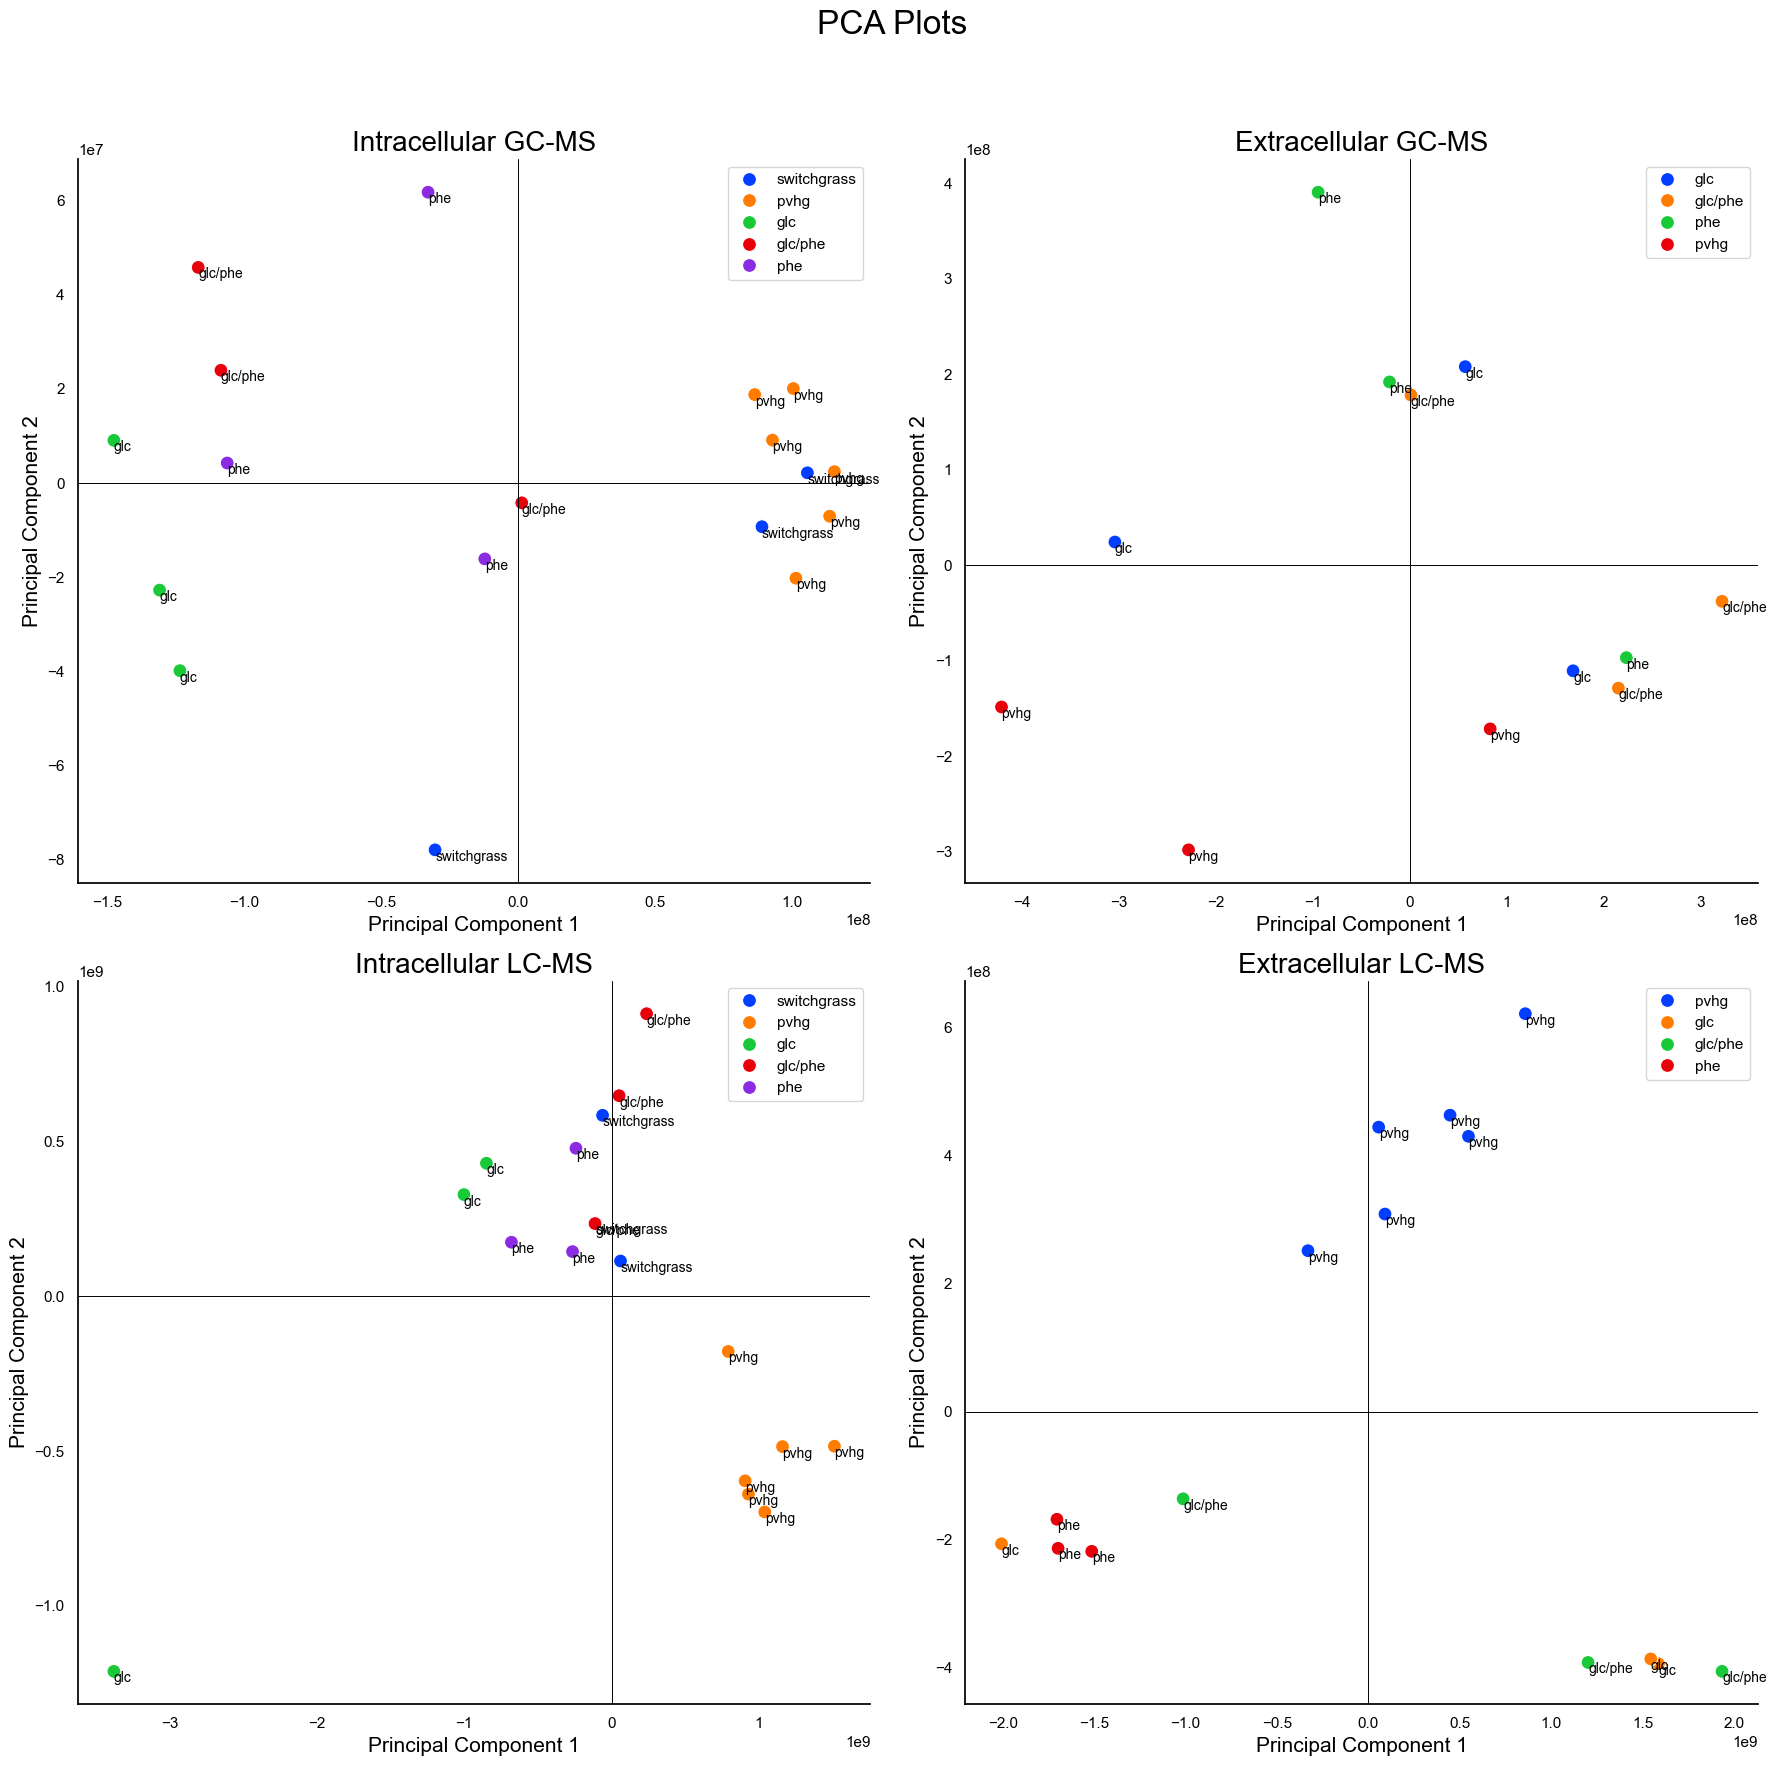

In [10]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))

# Plot each PCA plot in a separate subplot
plot_pca(axs[0, 0], intracellular_gc_ms_pca, 'Intracellular GC-MS')
plot_pca(axs[0, 1], extracellular_gc_ms_pca, 'Extracellular GC-MS')
plot_pca(axs[1, 0], intracellular_lc_ms_pos_pca, 'Intracellular LC-MS')
plot_pca(axs[1, 1], extracellular_lc_ms_pos_pca, 'Extracellular LC-MS')

# Add an overall title for the entire figure
fig.suptitle('PCA Plots', fontsize=24)

# Adjust layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()

### Define a function to generate a loading score bar plot

In [11]:
def plot_loading_scores(ax, loading_scores, title):
    # Sort the loading scores
    loading_scores.sort_values(ascending=False, inplace=True)
    
    # Plot the loading scores as a bar plot
    sns.barplot(x=loading_scores.values, y=loading_scores.index, ax=ax, hue=loading_scores.index, dodge=False, palette='bright', legend=False)
    
    # Set the title and labels
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Loading Score', fontsize=15)
    ax.set_ylabel('Metabolite', fontsize=15)

    # Remove vertical grid lines
    ax.grid(which='both', axis='x', linestyle='')

### Make a 2 x 2 grid of loading score plots

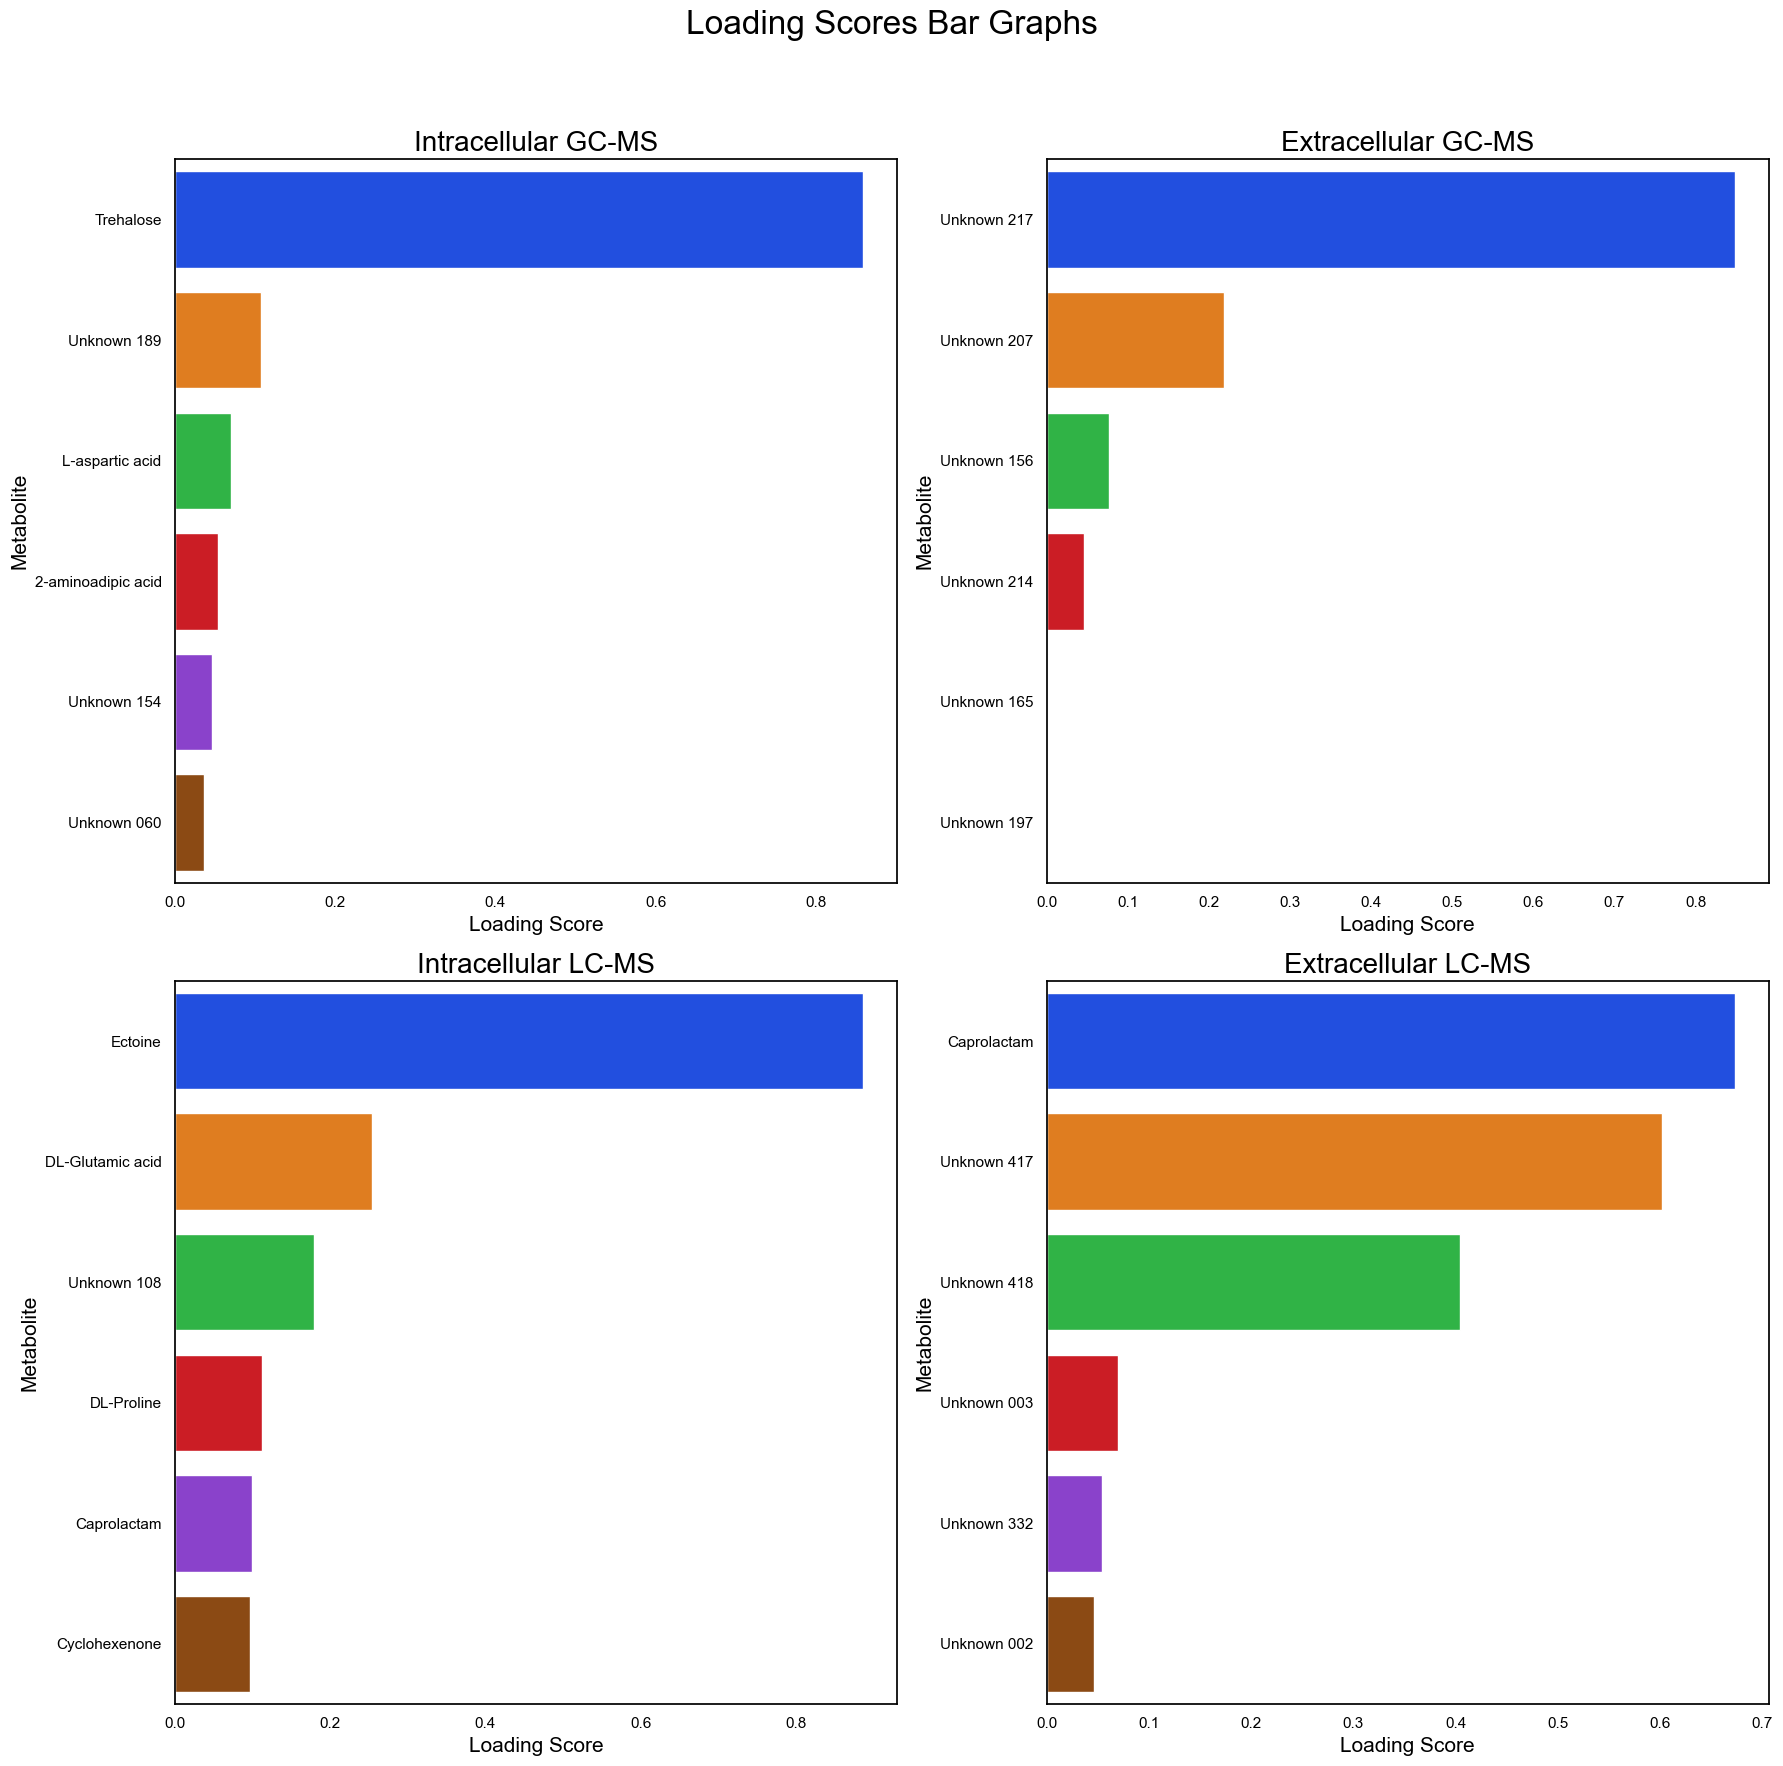

In [12]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))

# Plot each set of loading scores in a separate subplot
plot_loading_scores(axs[0, 0], intracellular_gc_ms_ls, 'Intracellular GC-MS')
plot_loading_scores(axs[0, 1], extracellular_gc_ms_ls, 'Extracellular GC-MS')
plot_loading_scores(axs[1, 0], intracellular_lc_ms_pos_ls, 'Intracellular LC-MS')
plot_loading_scores(axs[1, 1], extracellular_lc_ms_pos_ls, 'Extracellular LC-MS')

# Add an overall title for the entire figure
fig.suptitle('Loading Scores Bar Graphs', fontsize=24)

# Adjust layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()

### Get LDA components for intra- and extra- GC-MS and LC-MS data

In [16]:
intracellular_gc_ms_lda = get_lda_coordinates(intracellular_df)
extracellular_gc_ms_lda = get_lda_coordinates(extracellular_4_df)
intracellular_lc_ms_pos_lda = get_lda_coordinates(intracellular_pos_df)
extracellular_lc_ms_pos_lda = get_lda_coordinates(extracellular_pos_df)

intracellular_gc_ms_lda

,LD 1,LD 2,Group
0,-1.167867,2.670149,switchgrass
1,-1.232940,1.109581,switchgrass
2,-1.741747,2.423836,switchgrass
3,1.110609,0.124932,pvhg
4,2.993287,2.212607,pvhg
5,3.053789,1.962915,pvhg
6,-5.028610,0.139500,glc
7,-4.832001,1.734081,glc
8,-2.084008,-1.131059,glc
9,-0.241988,-1.548030,glc/phe


### Make a 2 x 2 grid of LDA plots

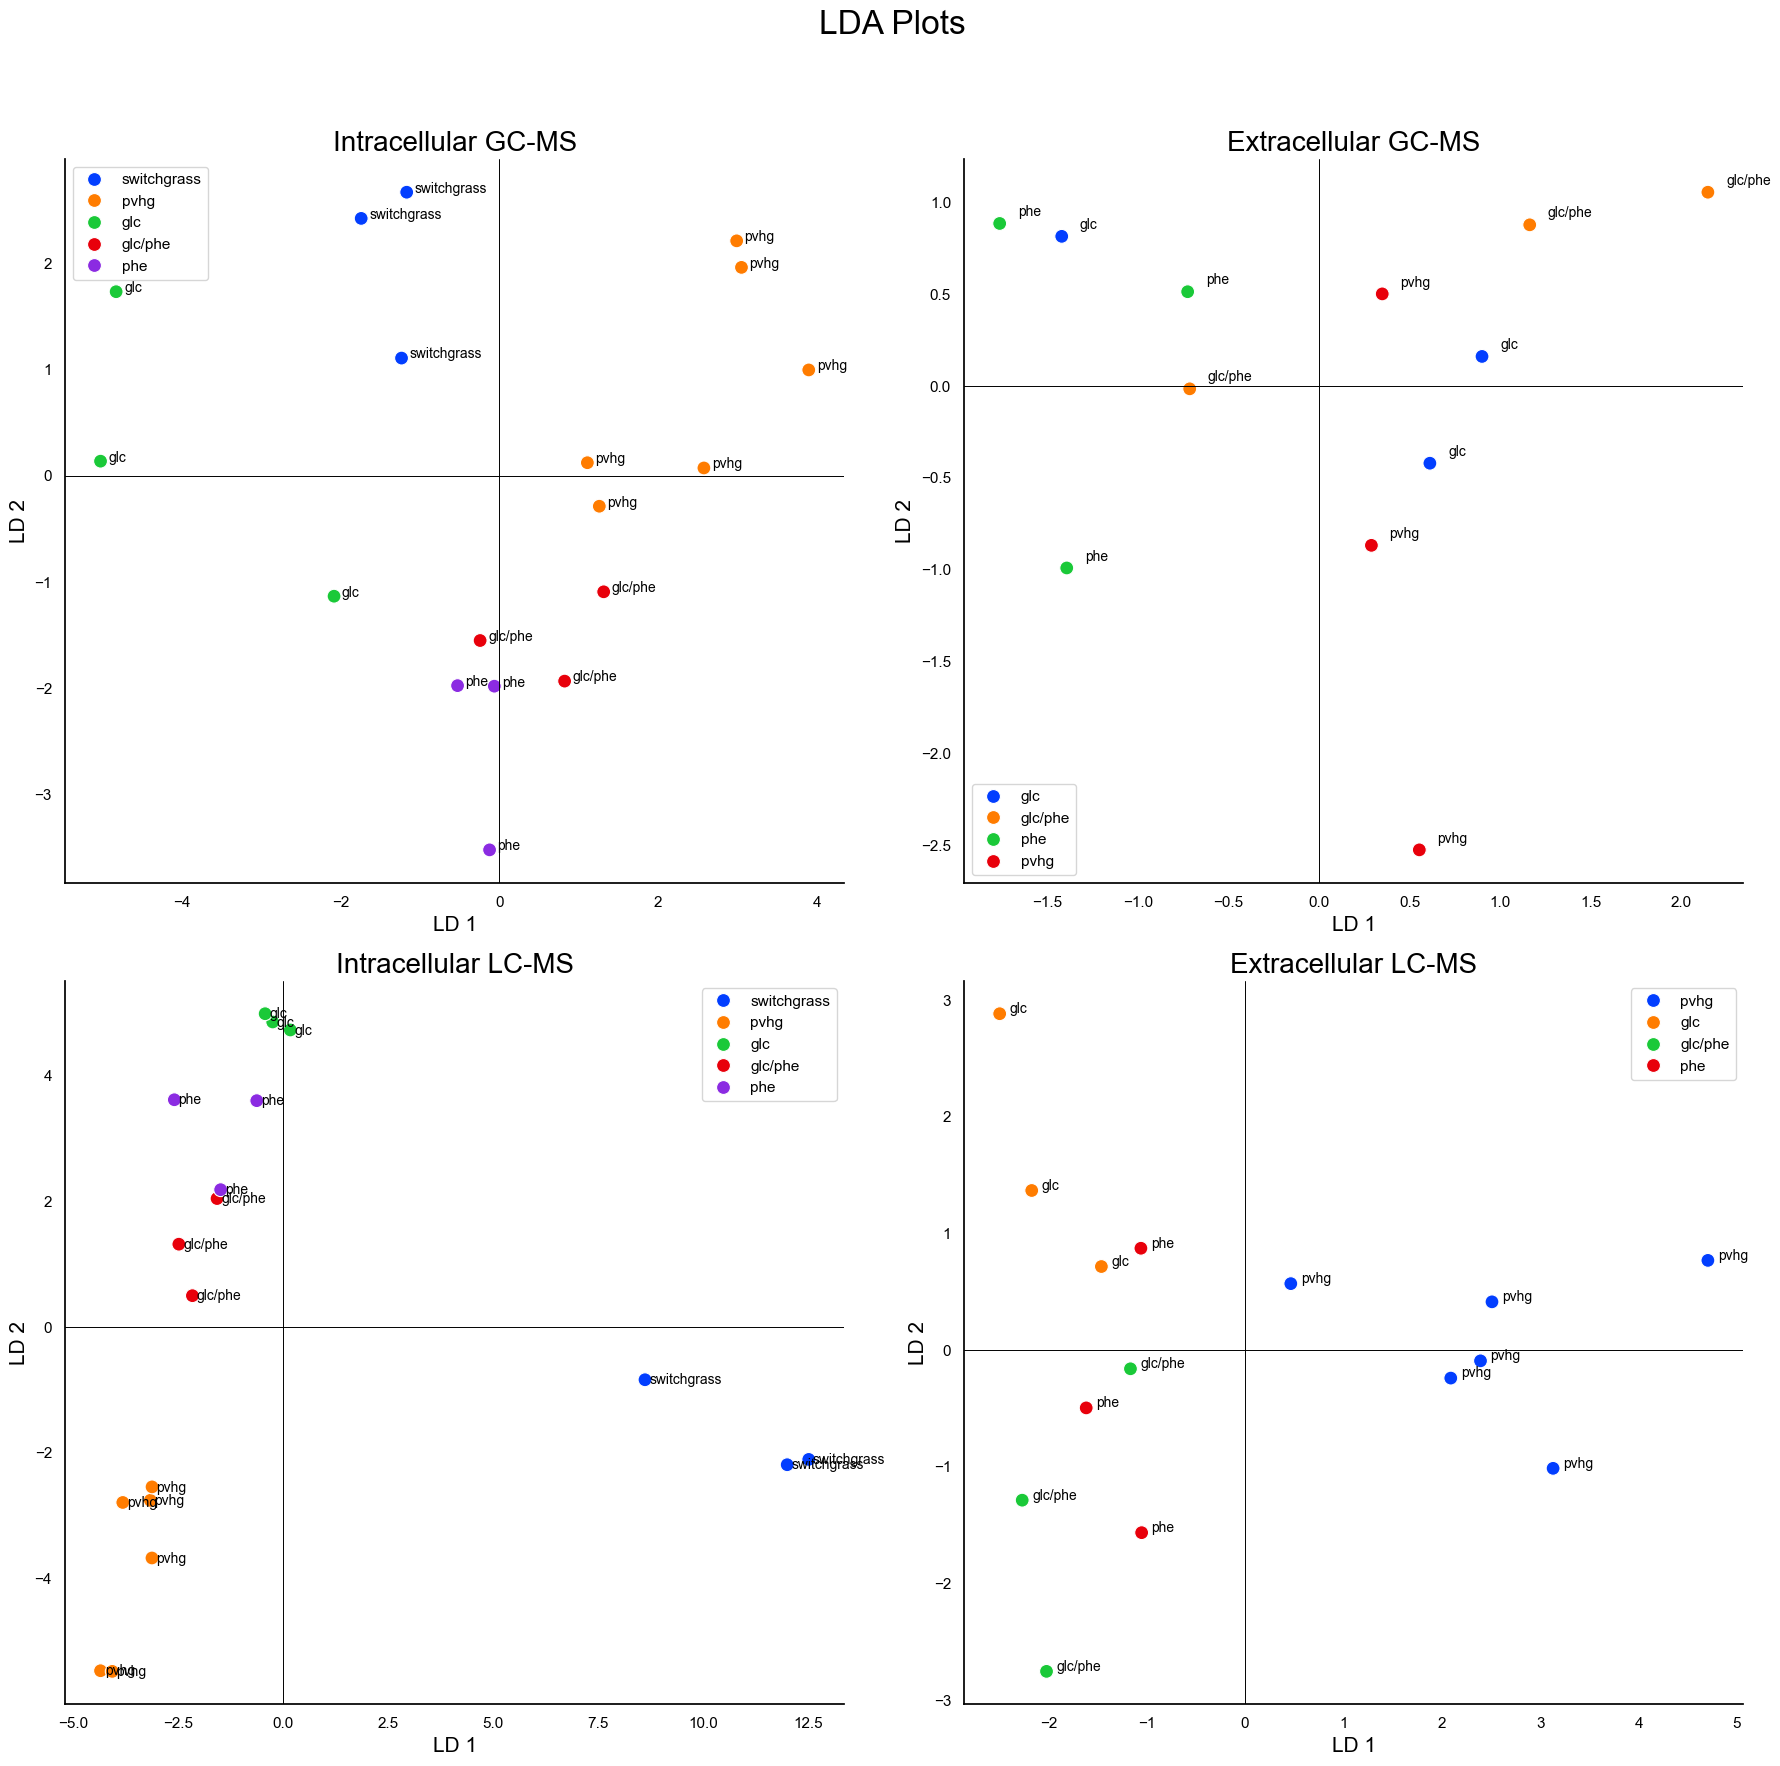

In [17]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))

# Plot each PCA plot in a separate subplot
plot_pca(axs[0, 0], intracellular_gc_ms_lda, 'Intracellular GC-MS')
plot_pca(axs[0, 1], extracellular_gc_ms_lda, 'Extracellular GC-MS')
plot_pca(axs[1, 0], intracellular_lc_ms_pos_lda, 'Intracellular LC-MS')
plot_pca(axs[1, 1], extracellular_lc_ms_pos_lda, 'Extracellular LC-MS')

# Add an overall title for the entire figure
fig.suptitle('LDA Plots', fontsize=24)

# Adjust layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()

### Make a loading plot for the LDA

### Create one long dataframe of intracellular data

In [ ]:
# Rename columns for consistency
intracellular_lcms_pos_df.rename(columns={'Name': 'Metabolite'}, inplace=True)
intracellular_lcms_neg_df.rename(columns={'Name': 'Metabolite'}, inplace=True)

# Concatenate dataframes vertically
combined_df = pd.concat([
    intracellular_gcms_df,
    intracellular_lcms_pos_df,
    intracellular_lcms_neg_df
], ignore_index=True)

# Subset the dataframe to only include the Metabolite and 24 data columns
selected_columns = ['Metabolite'] + list(combined_df.columns[2:26])
intracellular_df = combined_df[selected_columns]

intracellular_df

### Define a function to generate intracellular PCA data

In [ ]:
# Define a function to extract the group from the label
def extract_group(label):
    # Here you can add logic to identify the group. 
    # The example below assumes that the group is identified by everything before the last underscore.
    return '_'.join(label.split('_')[1:-3]).replace('_', ' ')

# Define a function to extract the group from the label
def extract_short_label(label):
    # Here you can add logic to identify the group. 
    # The example below assumes that the group is identified by everything before the last underscore.
    group = '_'.join(label.split('_')[1:-3]).replace('_', ' ')
    trial = label.split('_')[-1]

    return f'{group} {trial}'

def run_intracellular_pca(intracellular_df):
    # transpose the data to have features as rows
    df_transposed = intracellular_df.set_index('Metabolite').transpose()

    # perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_transposed)

    principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
    principal_df['label'] = df_transposed.index

    # Apply the function to create the 'group' column
    principal_df['group'] = principal_df['label'].apply(extract_group)
    principal_df['short label'] = principal_df['label'].apply(extract_short_label)

    return principal_df
    

### Define a function to plot PCA data

In [ ]:
def plot_pca_data(df, title):
    # plotting the PCA plot
    plt.figure(figsize=(9,9))

    # Plot the scores using the 'group' column for coloring
    sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="group", data=df, s=100, palette='bright')

    # Add text labels for each point
    for idx, row in df.iterrows():
        plt.text(row['Principal Component 1'] + 0.1, row['Principal Component 2'] + 0.1, row['short label'], ha="left", va="top", fontsize=10)

    plt.title(title)

    # Remove grid lines
    plt.grid(False)  

    # Hide the spines around the plot
    ax = plt.gca()  # Get the current axis
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # Add grid lines at x=0 and y=0
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.7)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.7)

    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside the plot
    plt.legend(loc='best')
    plt.show()

### Run intracellular PCA

In [ ]:
intracellular_pca_df = run_intracellular_pca(intracellular_df)
intracellular_pca_df

### Plot the Intracellular PCA data

In [ ]:
plot_pca_data(intracellular_pca_df, 'PCA Plot of Intracellular Metabolite Data')

### Define a function for intracellular LDA

In [ ]:
def run_intracellular_lda(intracellular_df):
    # transpose the data to have features as rows
    df_transposed = intracellular_df.set_index('Metabolite').transpose()

    # Extract groups (labels) for LDA
    labels = df_transposed.index.to_series().apply(extract_group)

    # perform LDA
    lda = LDA(n_components=2)  # Setting to 2 components for visualization, as in your PCA example
    canonical_variates = lda.fit_transform(df_transposed, labels)  # Note that we also pass in the labels

    canonical_df = pd.DataFrame(data=canonical_variates, columns=['LD 1', 'LD 2'])
    canonical_df['label'] = df_transposed.index

    # Populate the 'group' and 'short label' columns as before
    canonical_df['group'] = canonical_df['label'].apply(extract_group)
    canonical_df['short label'] = canonical_df['label'].apply(extract_short_label)

    return canonical_df

### Run intracellular LDA

In [ ]:
intracellular_lda_df = run_intracellular_lda(intracellular_df)

intracellular_lda_df

### Define a function to plot the LDA data

In [ ]:
def plot_lda_data(df, title):
    # plotting the PCA plot
    plt.figure(figsize=(9,9))

    # Plot the scores using the 'group' column for coloring
    sns.scatterplot(x="LD 1", y="LD 2", hue="group", data=df, s=100, palette='bright')

    # Add text labels for each point
    for idx, row in df.iterrows():
        plt.text(row['LD 1'] + 0.1, row['LD2'] + 0.1, row['short label'], ha="left", va="top", fontsize=10)

    plt.title(title)

    # Remove grid lines
    plt.grid(False)  

    # Hide the spines around the plot
    ax = plt.gca()  # Get the current axis
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # Add grid lines at x=0 and y=0
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.7)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.7)

    plt.legend(loc='best')
    plt.show()

### Plot LDA

In [ ]:
plot_lda_data(intracellular_lda_df, 'LDA Plot of Intracellular Metabolite Data')

### Load extracellular data

In [ ]:
extracellular_gcms_df = pd.read_csv('../results/gcms/gcms_extracellular_metabolites.csv')
extracellular_lcms_pos_df = pd.read_csv('../results/lcms/lcms_extracellular_pos_metabolites.csv')
extracellular_lcms_neg_df = pd.read_csv('../results/lcms/lcms_extracellular_neg_metabolites.csv')

display(extracellular_gcms_df.head(2))
display(extracellular_lcms_pos_df.head(2))
display(extracellular_lcms_neg_df.head(2))

### Create one long dataframe of extracellular data

In [ ]:
# Rename columns for consistency
extracellular_lcms_pos_df.rename(columns={'Name': 'Metabolite'}, inplace=True)
extracellular_lcms_neg_df.rename(columns={'Name': 'Metabolite'}, inplace=True)

# Concatenate dataframes vertically
combined_df = pd.concat([
    extracellular_gcms_df,
    extracellular_lcms_pos_df,
    extracellular_lcms_neg_df
], ignore_index=True)

# Subset the dataframe to only include the Metabolite and 24 data columns
selected_columns = ['Metabolite'] + list(combined_df.columns[3:80])
extracellular_df = combined_df[selected_columns]

extracellular_df

### Define a function to generate extracellular PCA data

In [ ]:
# Define a function to extract the group from the label
def extract_group(label):
    if 'media' in label or 'gresham' in label:
        return 'media'
    
    group = ' '.join(label.split('_')[1:-1])
    return group

# Define a function to extract the group from the label
def extract_short_label(label):

    return label.replace('_', ' ').replace('ex ', '')

def run_extracellular_pca(extracellular_df):
    # transpose the data to have features as rows
    df_transposed = extracellular_df.set_index('Metabolite').transpose()

    # perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_transposed)

    principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
    principal_df['label'] = df_transposed.index

    # Apply the function to create the 'group' column
    principal_df['group'] = principal_df['label'].apply(extract_group)
    principal_df['short label'] = principal_df['label'].apply(extract_short_label)

    return principal_df

### Run extracellular PCA

In [ ]:
extracellular_pca_df = run_extracellular_pca(extracellular_df)

extracellular_pca_df

### Plot the Extracellular PCA data

In [ ]:
plot_pca_data(extracellular_pca_df, 'PCA Plot of Extracellular Metabolite Data')

### Filter outlier and replot PCA

In [ ]:
# filter label = 'gresham glc t0'
extracellular_pca_df = extracellular_pca_df[extracellular_pca_df['label'] != 'gresham_glc_t0']

extracellular_pca_df 

In [ ]:
plot_pca_data(extracellular_pca_df, 'PCA Plot of Extracellular Metabolite Data')

### Define a function for extracellular LDA

In [ ]:
def run_extracellular_lda(extracellular_df):
    # transpose the data to have features as rows
    df_transposed = extracellular_df.set_index('Metabolite').transpose()

    # Extract groups (labels) for LDA
    labels = df_transposed.index.to_series().apply(extract_group)

    # perform LDA
    lda = LDA(n_components=2)  # Setting to 2 components for visualization, as in your PCA example
    canonical_variates = lda.fit_transform(df_transposed, labels)  # Note that we also pass in the labels

    canonical_df = pd.DataFrame(data=canonical_variates, columns=['LD 1', 'LD 2'])
    canonical_df['label'] = df_transposed.index

    # Populate the 'group' and 'short label' columns as before
    canonical_df['group'] = canonical_df['label'].apply(extract_group)
    canonical_df['short label'] = canonical_df['label'].apply(extract_short_label)

    return canonical_df

### Run extracellular LDA

In [ ]:
# run extracellular LDA
extracellular_lda_df = run_extracellular_lda(extracellular_df)

extracellular_lda_df

### Plot the LDA data

In [ ]:
plot_lda_data(extracellular_lda_df, 'LDA Plot of Extracellular Metabolite Data')

### Make separate plots for consumed vs overflow metabolites

In [ ]:
# remove columns with media in the label
# extracellular_df = extracellular_df[extracellular_df['label'] != 'media']
extracellular_df = extracellular_df.drop([col for col in extracellular_df.columns if 'media' in col or 'gresham' in col], axis=1)

columns = extracellular_df.columns


# extracellular_lda_df = extracellular_lda_df[extracellular_lda_df['label'] != 'media']
print(extracellular_df.columns)
len(extracellular_df.columns)